<a id = '4.11'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>
TUGAS UTS SISTEM CERDAS<br>
SEMESTER 2 THN 2024<br>
</strong></p> 
<h4>
<b>DOSEN PENGAMPU : Ir. Noor Akhmad Setiawan, S.T., M.T., Ph.D., IPM.</b><br><br>
NIM : 23/524967/PTK/15293<br>
NAMA : RADITYA ARIZAL PRANATA<br>
MATA KULIAH : SISTEM CERDAS</h4>

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>PREDIKSI KEHADIRAN PEGAWAI TEPAT WAKTU</strong></p> 

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

pd.options.display.max_colwidth = 200
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Baca dataset
df = pd.read_excel(r'D:\UP3 SBS\2021-2023\SDM.TAD\SDM\PENDIDIKAN FORMAL\PTB Radit 2023\00. MTI UGM\Semester 2\05. SISTEM CERDAS - NAS, SAI\TUGAS UTS\dataset_absensi_tw1_tahun2024.xlsx')
print(df)

         pernr                           name  Telat  Lembur  personnel_area  \
0     97193811        FARADIBA FAJAR RAMADHAN      0       1            3400   
1     97193811        FARADIBA FAJAR RAMADHAN      1       0            3400   
2     98203805                SAYUTI ABDILLAH      0       0            3400   
3     84083804               DANU ARI NUGROHO      0       0            3400   
4     95163801  ACHMAD FIRMANSYAH MEIDI PUTRA      0       0            3400   
...        ...                            ...    ...     ...             ...   
9690  90103811             BAGUS BUDI MARTONO      0       0            3400   
9691  90103811             BAGUS BUDI MARTONO      0       0            3400   
9692  70923828                   RUDY SANTOSO      0       0            3400   
9693  70923828                   RUDY SANTOSO      0       0            3400   
9694  83043824              DWI AGUS PRIHATIN      0       0            3400   

      personnel_sub_area personnel_sub_

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pernr                    9695 non-null   int64  
 1   name                     9695 non-null   object 
 2   Telat                    9695 non-null   int64  
 3   Lembur                   9695 non-null   int64  
 4   personnel_area           9695 non-null   int64  
 5   personnel_sub_area       9695 non-null   int64  
 6   personnel_sub_area_name  9695 non-null   object 
 7   personnel_area_name      9695 non-null   object 
 8   type                     9695 non-null   object 
 9   org_unit                 9695 non-null   int64  
 10  description              9695 non-null   object 
 11  time                     9695 non-null   object 
 12  date                     9695 non-null   object 
 13  status                   9695 non-null   object 
 14  longitude               

In [49]:
df.describe()

,pernr,Telat,Lembur,personnel_area,personnel_sub_area,org_unit,longitude,latitude,range,atasan_pernr
count,9.695000e+03,9695.00000,9695.000000,9695.0,9695.000000,9.695000e+03,9695.000000,9695.000000,9.695000e+03,9.695000e+03
mean,8.534019e+07,0.05704,0.179268,3400.0,2201.450748,1.028257e+07,111.856206,-7.249458,1.526625e+03,8.354429e+07
std,9.339920e+06,0.23193,0.383596,0.0,1.805598,1.238165e+06,9.879810,0.649046,2.517149e+04,6.828059e+06
min,6.891380e+07,0.00000,0.000000,3400.0,2200.000000,1.004708e+07,0.000000,-8.838305,0.000000e+00,6.891381e+07
25%,7.692380e+07,0.00000,0.000000,3400.0,2200.000000,1.004711e+07,112.727625,-7.290189,2.000000e+01,7.906140e+07
50%,8.808100e+07,0.00000,0.000000,3400.0,2200.000000,1.004766e+07,112.749716,-7.288844,5.600000e+01,8.509381e+07
75%,9.218380e+07,0.00000,0.000000,3400.0,2203.000000,1.004778e+07,112.749907,-7.288440,9.400000e+01,8.909384e+07
max,9.917380e+07,1.00000,1.000000,3400.0,2205.000000,1.730069e+07,127.379302,0.791894,1.854072e+06,9.717385e+07


In [50]:
print(df.corr(numeric_only=True))

                       pernr     Telat    Lembur  personnel_area  \
pernr               1.000000 -0.044844  0.151949             NaN   
Telat              -0.044844  1.000000 -0.114946             NaN   
Lembur              0.151949 -0.114946  1.000000             NaN   
personnel_area           NaN       NaN       NaN             NaN   
personnel_sub_area  0.026113  0.021858  0.038962             NaN   
org_unit            0.012144 -0.019854  0.006473             NaN   
longitude          -0.045370  0.001633  0.019808             NaN   
latitude            0.048409 -0.006770 -0.021805             NaN   
range               0.000591 -0.003873 -0.000299             NaN   
atasan_pernr        0.250804 -0.017871  0.062462             NaN   

                    personnel_sub_area  org_unit  longitude  latitude  \
pernr                         0.026113  0.012144  -0.045370  0.048409   
Telat                         0.021858 -0.019854   0.001633 -0.006770   
Lembur                        0.

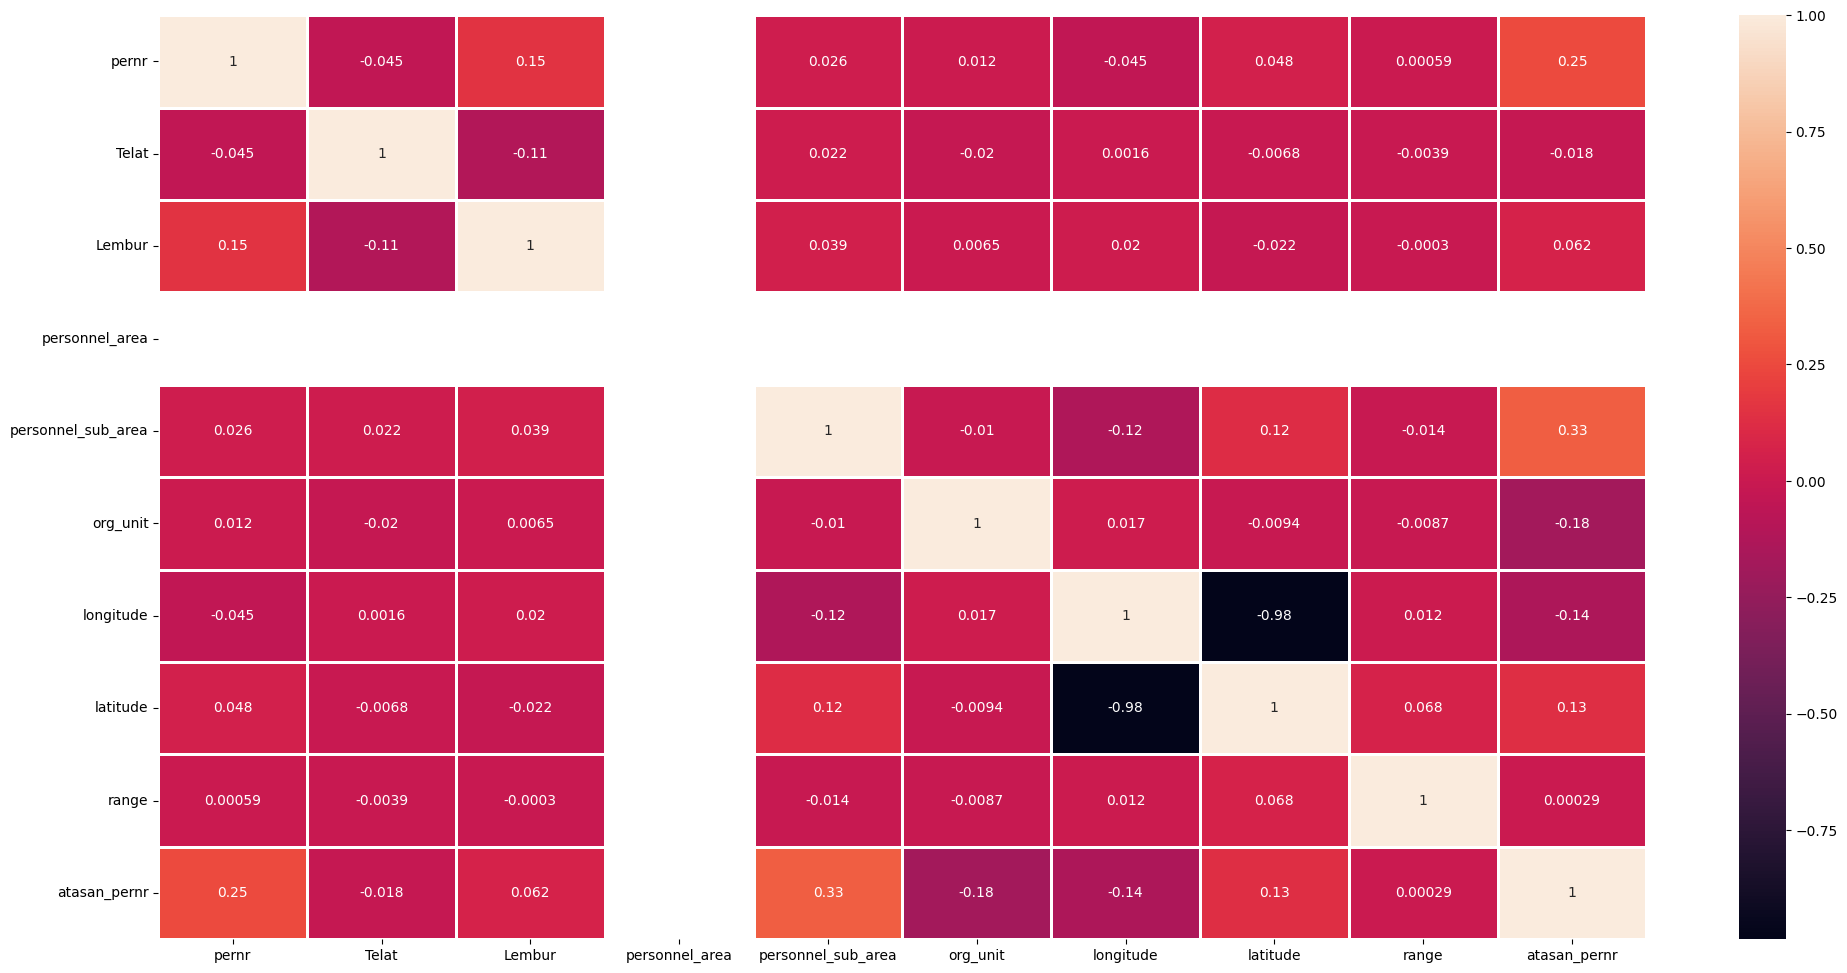

In [51]:
plt.figure(figsize = (24, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [52]:
correlation = df.corr(numeric_only=True)['Telat'].abs().sort_values(ascending = False)
correlation

Telat                 1.000000
Lembur                0.114946
pernr                 0.044844
personnel_sub_area    0.021858
org_unit              0.019854
atasan_pernr          0.017871
latitude              0.006770
range                 0.003873
longitude             0.001633
personnel_area             NaN
Name: Telat, dtype: float64

In [53]:
# creating numerical and categorical dataframes
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['name',
 'personnel_sub_area_name',
 'personnel_area_name',
 'type',
 'description',
 'time',
 'date',
 'status',
 'atasan_name',
 'created_at']

In [54]:
cat_df = df[cat_cols]
cat_df.head()

,name,personnel_sub_area_name,personnel_area_name,type,description,time,date,status,atasan_name,created_at
0,FARADIBA FAJAR RAMADHAN,ULP NGAGEL,UID JATIM,CLOCK_OUT,-,22:33:10,2024-01-01,APPROVED,DANU ARI NUGROHO,2024-01-01 22:33:10
1,FARADIBA FAJAR RAMADHAN,ULP NGAGEL,UID JATIM,CLOCK_IN,-,10:36:00,2024-01-01,APPROVED,DANU ARI NUGROHO,2024-01-01 22:40:18
2,SAYUTI ABDILLAH,ULP GEDANGAN,UID JATIM,CLOCK_IN,-,00:33:19,2024-01-02,APPROVED,EKA YULIANA PURNAMASARI,2024-01-02 00:33:19
3,DANU ARI NUGROHO,ULP NGAGEL,UID JATIM,CLOCK_IN,-,01:22:59,2024-01-02,APPROVED,DIDIT TRI WICAKSONO,2024-01-02 01:22:59
4,ACHMAD FIRMANSYAH MEIDI PUTRA,UP3 SBY SEL,UID JATIM,CLOCK_IN,-,05:50:45,2024-01-02,APPROVED,EKO WIJAYANTO,2024-01-02 05:50:45


In [55]:
cat_df['date'] = pd.to_datetime(cat_df['date'])
cat_df['year'] = cat_df['date'].dt.year
cat_df['month'] = cat_df['date'].dt.month
cat_df['day'] = cat_df['date'].dt.day

cat_df['time'] = pd.to_datetime(cat_df['time'])
cat_df['hours'] = cat_df['time'].dt.hour
cat_df['minutes'] = cat_df['time'].dt.minute
cat_df['seconds'] = cat_df['time'].dt.second

cat_df.drop(['date','time','description','atasan_name','created_at'] , axis = 1, inplace = True)

In [56]:
cat_df.head()

,name,personnel_sub_area_name,personnel_area_name,type,status,year,month,day,hours,minutes,seconds
0,FARADIBA FAJAR RAMADHAN,ULP NGAGEL,UID JATIM,CLOCK_OUT,APPROVED,2024,1,1,22,33,10
1,FARADIBA FAJAR RAMADHAN,ULP NGAGEL,UID JATIM,CLOCK_IN,APPROVED,2024,1,1,10,36,0
2,SAYUTI ABDILLAH,ULP GEDANGAN,UID JATIM,CLOCK_IN,APPROVED,2024,1,2,0,33,19
3,DANU ARI NUGROHO,ULP NGAGEL,UID JATIM,CLOCK_IN,APPROVED,2024,1,2,1,22,59
4,ACHMAD FIRMANSYAH MEIDI PUTRA,UP3 SBY SEL,UID JATIM,CLOCK_IN,APPROVED,2024,1,2,5,50,45


In [57]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

name: 
['FARADIBA FAJAR RAMADHAN' 'SAYUTI ABDILLAH' 'DANU ARI NUGROHO'
 'ACHMAD FIRMANSYAH MEIDI PUTRA' 'AGENG SULISTIONO' 'FERY AGUS SETIAWAN'
 'TOKIT ROMLI' 'PRIYONO DWI SANTOSO' 'RENALDO ADI PUTRA'
 'ANANG DWI ALRIANTO' 'SUPRIYADI' 'BAYU INDRA TIRTANA'
 'YUNAIDA SANDRA WARDANI' 'DEDE KURNIAKA' 'FUAD HASAN'
 'FERDIAN DICKY YULIANZA' 'FATKHUR ROZI' 'MOCH. ARIF SAIFUDIN'
 'RESA SADEWA EKA DAROINI' 'MUHAMMAD ABDUL WAHID' 'YOGI FEBRIANTO JAYADI'
 'ZAINUL ABIDIN' 'RADITYA ARIZAL PRANATA' 'ANISA NOVITASARI'
 'ROBEKA PRAHISTIN' 'SRI PURWORINI' 'PUDJI HARDIJANTI'
 'FRENGKI INDRA BAYUNTORO' 'SHINTA PRAMIASIH' 'ARIF LUKMAN HAKIM'
 'LUCYANA HARVIANTI' 'RENDYKA EGA PRASETYO' 'MUHAMMAD NUR HIDAYATULLAH'
 'RIZKY HIDAYAT' 'KISMONO' 'DWI AGUS PRIHATIN' 'ARIESTA ARDININGSIH'
 'RAKHMAT KAMARTA' 'ACHMAD RONI' 'ANTON BUDI SAPUTRO' 'RAHMAT RIYADI'
 'MOCHAMAD ABDUL BASYID NURUL FAUZI' 'FARID SETYO WIBOWO' 'ELOK NASTITI'
 'FIRDA ARIEFINIA' 'ROMI SETIADI' 'MOCHAMAD FARIS BAIHAQI'
 'TEGUH PRASETYO' 'RIO APER

In [58]:
# convert to number
cat_df['name'] = cat_df['name'].map({
    "FARADIBA FAJAR RAMADHAN" : 0,
    "SAYUTI ABDILLAH" : 1,
    "DANU ARI NUGROHO" : 2,
    "ACHMAD FIRMANSYAH MEIDI PUTRA" : 3,
    "AGENG SULISTIONO" : 4,
    "FERY AGUS SETIAWAN" : 5,
    "TOKIT ROMLI" : 6,
    "PRIYONO DWI SANTOSO" : 7,
    "RENALDO ADI PUTRA" : 8,
    "ANANG DWI ALRIANTO" : 9,
    "SUPRIYADI" : 10,
    "BAYU INDRA TIRTANA" : 11,
    "YUNAIDA SANDRA WARDANI" : 12,
    "DEDE KURNIAKA" : 13,
    "FUAD HASAN" : 14,
    "FERDIAN DICKY YULIANZA" : 15,
    "FATKHUR ROZI" : 16,
    "MOCH. ARIF SAIFUDIN" : 17,
    "RESA SADEWA EKA DAROINI" : 18,
    "MUHAMMAD ABDUL WAHID" : 19,
    "YOGI FEBRIANTO JAYADI" : 20,
    "ZAINUL ABIDIN" : 21,
    "RADITYA ARIZAL PRANATA" : 22,
    "ANISA NOVITASARI" : 23,
    "ROBEKA PRAHISTIN" : 24,
    "SRI PURWORINI" : 25,
    "PUDJI HARDIJANTI" : 26,
    "FRENGKI INDRA BAYUNTORO" : 27,
    "SHINTA PRAMIASIH" : 28,
    "ARIF LUKMAN HAKIM" : 29,
    "LUCYANA HARVIANTI" : 30,
    "RENDYKA EGA PRASETYO" : 31,
    "MUHAMMAD NUR HIDAYATULLAH" : 32,
    "RIZKY HIDAYAT" : 33,
    "KISMONO" : 34,
    "DWI AGUS PRIHATIN" : 35,
    "ARIESTA ARDININGSIH" : 36,
    "RAKHMAT KAMARTA" : 37,
    "ACHMAD RONI" : 38,
    "ANTON BUDI SAPUTRO" : 39,
    "RAHMAT RIYADI" : 40,
    "MOCHAMAD ABDUL BASYID NURUL FAUZI" : 41,
    "FARID SETYO WIBOWO" : 42,
    "ELOK NASTITI" : 43,
    "FIRDA ARIEFINIA" : 44,
    "ROMI SETIADI" : 45,
    "MOCHAMAD FARIS BAIHAQI" : 46,
    "TEGUH PRASETYO" : 47,
    "RIO APERTA" : 48,
    "GATUT DIRGANTARA" : 49,
    "CHOIRUL ARIFIN" : 50,
    "M. DIYAR YASIN" : 51,
    "ABDUL MUNIB" : 52,
    "AHMAD KHOLILI ALI BURHAN" : 53,
    "KRISNA SUTOPO" : 54,
    "RENY YUNIAWATI" : 55,
    "ADIN EKO FRISMANA" : 56,
    "BRITISH SHIMAHERO" : 57,
    "SATRIA SAIFUL ROHMAN" : 58,
    "IWAN SATRIO CAHYONO" : 59,
    "KUS SUPRIANTO" : 60,
    "RIYAN EKO ARDIANTO" : 61,
    "NARKO DWI PRASETYO" : 62,
    "BAGUS BUDI MARTONO" : 63,
    "MALTHUF ALFATA" : 64,
    "RUDY SANTOSO" : 65,
    "WAHYU PRIADI" : 66,
    "HERAWATI WAHYUNINGSIH" : 67,
    "TYAS ARIYUNAR RAHMA" : 68,
    "ENY YULI ASTUTIK" : 69,
    "SYAFIRA BELLA ISLAMI" : 70,
    "ZULFIKAR EKA TITA" : 71,
    "MASRURI SAHAR" : 72,
    "EKA YULI ROSANAWATI" : 73,
    "SARWO HADI WIBOWO" : 74,
    "ZANUAR KUSTARUDIN" : 75,
    "HERA YOLANDARI BARUS" : 76,
    "EKA YULIANA PURNAMASARI" : 77,
    "RUSTAM BACHTIAR" : 78,
    "NUNUK ANGGORO PAMULARSIH" : 79,
    "ENY ENDARYANTI" : 80,
    "EKO WIJAYANTO" : 81,
    "ARGITYA RISGIANANDA" : 82,
    "RIZA PRIMADONA" : 83,
    "MIFTAKHUR ROZIQ MAHMI DESY" : 84,
    "EKOWATI YULIASTINI" : 85,
    "AULIA KURNIAWAN" : 86,
    "ARYANTO" : 87,
    "MUHAMMAD FAJAR ISLAM" : 88,
    "HENDY HERNAWAN" : 89,
    "DIAN NOVITASARI S" : 90,
    "MELINDA NUR ARDIANI" : 91,
    "MOCHAMAD RUSDIONO" : 92,
    "NANCY ALLORERUNG" : 93,
    "ALANFI SYAHBANA" : 94,
    "EFRILIA EKA KARTIKA SARI" : 95,
    "YENNY SUGIYONO SUYADI" : 96,
    "MERRYSKHE LELA" : 97,
    "RIZKY SETYAWAN" : 98,
    "HARRY CHRISTANTO" : 99,
    "RIZKI AULIA RATNANI" : 100,
    "DEWI RATNA PRATIWI" : 101,
    "VORY GOES BARTHA SITRA" : 102,
    "DIKY SAMBUDO" : 103,
    "REZA MAULANA NUR HIDAYAT" : 104,
    "MOCHAMAD MAKRUF" : 105,
    "GUGUS SUDARWANTO" : 106,
    "BLANDINA AUDREY PANGGABEAN" : 107,
    "AULIA NOVIANI" : 108,
    "MARICHA LIKINIA" : 109,
    "FIKKA PRATIWI" : 110,
    "ARDIK CRISDIANTO" : 111,
    "PUTRA SURYA PRIBADI" : 112,
    "BOY EBI YOSEP TAMBA" : 113,
    "TEGOEH SETIAWAN" : 114,
    "NURHAYATI" : 115,
    "FAYGA OKTAWINANTI" : 116,
    "BAGUS SETYAWAN DARMANTO" : 117,
    "LINTA UNTSA SIFA DHANA" : 118,
    "MAGHFIRATUL QOLBIYAH" : 119,
    "FRAN SINTA SURYANI" : 120,
    "HIMMATUL A'IMMAH" : 121,
    "FERA HARTOYO" : 122
    })
cat_df['personnel_area_name'] = cat_df['personnel_area_name'].map({'UID JATIM': 0})
cat_df['personnel_sub_area_name'] = cat_df['personnel_sub_area_name'].map({   
    "UP3 SBY SEL" : 0, 
    "ULP GEDANGAN" : 1,
    "ULP DARMO PRMAI" : 2,
    "ULP DUKUH KPG" : 3,
    "ULP NGAGEL" : 4,
    "ULP RUNGKUT" : 5
    })
cat_df['type'] = cat_df['type'].map({  
    "CLOCK_IN" : 0,
    "CLOCK_OUT" : 1 
    })
cat_df['status'] = cat_df['status'].map({    
    "APPROVED" : 0,
    "NEED APPROVAL" : 1,
    "REJECT" : 2
    })


In [59]:
cat_df.head()
print(cat_df)
#cat_df.to_excel(r'D:\UP3 SBS\2021-2023\SDM.TAD\SDM\PENDIDIKAN FORMAL\PTB Radit 2023\00. MTI UGM\Semester 2\05. SISTEM CERDAS - NAS, SAI\TUGAS UTS\DataProsesAbsen.xlsx', index=False)

      name  personnel_sub_area_name  personnel_area_name  type  status  year  \
0        0                        4                    0     1       0  2024   
1        0                        4                    0     0       0  2024   
2        1                        1                    0     0       0  2024   
3        2                        4                    0     0       0  2024   
4        3                        0                    0     0       0  2024   
...    ...                      ...                  ...   ...     ...   ...   
9690    63                        0                    0     1       0  2024   
9691    63                        0                    0     1       0  2024   
9692    65                        2                    0     1       0  2024   
9693    65                        2                    0     0       0  2024   
9694    35                        0                    0     0       0  2024   

      month  day  hours  minutes  secon

In [60]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('Telat', axis = 1, inplace = True)
num_df

,pernr,Lembur,personnel_area,personnel_sub_area,org_unit,longitude,latitude,range,atasan_pernr
0,97193811,1,3400,2202,10069336,112.749824,-7.289038,35,84083804
1,97193811,0,3400,2202,10069336,112.750241,-7.289059,58,84083804
2,98203805,0,3400,2201,10069328,112.727597,-7.374048,29,89093839
3,84083804,0,3400,2202,10050813,112.749850,-7.288757,63,73943821
4,95163801,0,3400,2200,10047152,112.749665,-7.288363,108,84043810
...,...,...,...,...,...,...,...,...,...
9690,90103811,0,3400,2200,10050815,112.749737,-7.288846,70,89093868
9691,90103811,0,3400,2200,10050815,112.749727,-7.288850,70,89093868
9692,70923828,0,3400,2203,10069337,112.684119,-7.275644,8,92163800
9693,70923828,0,3400,2203,10069337,112.684191,-7.275776,9,92163800


In [61]:
num_df.var()

pernr                 8.723410e+13
Lembur                1.471459e-01
personnel_area        0.000000e+00
personnel_sub_area    3.260185e+00
org_unit              1.533052e+12
longitude             9.761065e+01
latitude              4.212608e-01
range                 6.336038e+08
atasan_pernr          4.662239e+13
dtype: float64

In [62]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['Telat']

In [63]:
X.shape, y.shape

((9695, 20), (9695,))

In [64]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [65]:
X_train.head()

,name,personnel_sub_area_name,personnel_area_name,type,status,year,month,day,hours,minutes,seconds,pernr,Lembur,personnel_area,personnel_sub_area,org_unit,longitude,latitude,range,atasan_pernr
4264,90,0,0,1,0,2024,1,26,16,30,18,89093862,0,3400,2200,10067727,112.749824,-7.288959,57,79061404
2884,69,4,0,1,0,2024,1,18,16,54,39,87105209,0,3400,2202,10047651,112.684404,-7.236567,24,79061404
8005,12,0,0,1,0,2024,2,21,16,12,0,95143817,0,3400,2200,10047152,112.749664,-7.288381,107,84043810
8613,1,1,0,0,0,2024,2,27,6,44,0,98203805,0,3400,2201,10069328,112.727565,-7.374042,33,89093839
7468,59,5,0,0,0,2024,2,20,7,16,19,85097409,0,3400,2205,10047660,112.752062,-7.336119,199,79061404


In [66]:
X_test.head()

,name,personnel_sub_area_name,personnel_area_name,type,status,year,month,day,hours,minutes,seconds,pernr,Lembur,personnel_area,personnel_sub_area,org_unit,longitude,latitude,range,atasan_pernr
6012,43,3,0,1,0,2024,2,6,18,22,59,70923800,1,3400,2204,10069342,112.713909,-7.289984,155,87110004
5638,11,0,0,0,0,2024,2,5,7,12,32,87113811,0,3400,2200,10047104,112.749811,-7.288823,63,70923831
9166,53,5,0,0,0,2024,2,29,7,23,25,92123824,0,3400,2205,17300691,112.743949,-7.265900,52,85097409
6570,100,0,0,0,0,2024,2,13,7,23,33,89160014,0,3400,2200,10047104,112.749615,-7.288840,82,86093813
1667,93,1,0,0,0,2024,1,11,8,7,38,68943806,0,3400,2201,10069332,112.727687,-7.373965,19,89113808


In [67]:
y_train.head(), y_test.head()

(4264    0
 2884    0
 8005    0
 8613    0
 7468    0
 Name: Telat, dtype: int64,
 6012    0
 5638    0
 9166    0
 6570    0
 1667    1
 Name: Telat, dtype: int64)

<a id = '4.11'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>MODEL BUILDING : ANN</strong></p> 

In [68]:
from tensorflow.keras.utils import to_categorical

X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(df['Telat'])


In [69]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [70]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


213/213 [==============================] - 1s 3ms/step - loss: 225619.2969 - accuracy: 0.9338 - val_loss: 237579.0625 - val_accuracy: 0.9426
Epoch 2/50
213/213 [==============================] - 0s 2ms/step - loss: 144190.5156 - accuracy: 0.9378 - val_loss: 118651.0312 - val_accuracy: 0.9426
Epoch 3/50
213/213 [==============================] - 0s 2ms/step - loss: 119869.9141 - accuracy: 0.9303 - val_loss: 124897.3984 - val_accuracy: 0.9426
Epoch 4/50
213/213 [==============================] - 0s 2ms/step - loss: 93492.7109 - accuracy: 0.9272 - val_loss: 38840.3008 - val_accuracy: 0.9426
Epoch 5/50
213/213 [==============================] - 0s 2ms/step - loss: 106494.7656 - accuracy: 0.9355 - val_loss: 170988.7344 - val_accuracy: 0.9426
Epoch 6/50
213/213 [==============================] - 0s 2ms/step - loss: 92572.2812 - accuracy: 0.9335 - val_loss: 135430.3125 - val_accuracy: 0.9426
Epoch 7/50
213/213 [==============================] - 0s 2ms/step - loss: 77687.6328 - accuracy: 0.926

In [74]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 51)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>

In [75]:
plt.figure(figsize = (12, 6))

train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, 51)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

<Figure size 1200x600 with 0 Axes>

In [73]:
acc_ann = model.evaluate(X_test, y_test)[1]
print(f'Accuracy of model is {acc_ann}')

91/91 [==============================] - 0s 1ms/step - loss: 1870.5270 - accuracy: 0.9426
Accuracy of model is 0.9425919651985168
